### Load the Modules and Data ###

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ema_workbench.util import load_results
experiments, outcomes = load_results(r'all_exploitation_5000.tar.gz')

### Let's do a first visualization of the outcome space ###

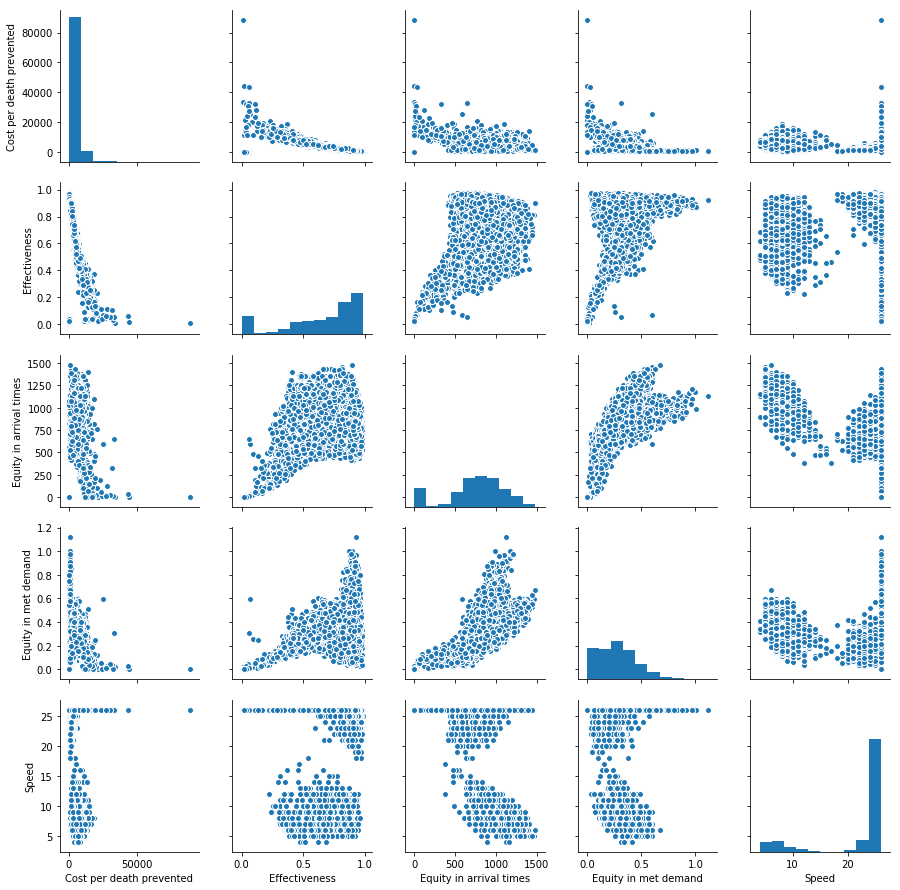

In [2]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

Notable: 
- Costs per life saved decrease as effectiveness increases
- Funny "bump" in effectiveness versus equity in met demand: when you're medium effective (Around 0.5) you actully see equity decreases because then you're doing a response but not covering everyone
- All values for equity in arrival times exist with a slow response (i.e. speed = 26) but when speed decreases very high values (poor performance) dissapears. When the response gets very fast, however, they increase again. Speculation: if the response is medium-slow, all areas have to wait a medium amount so it's fairly equal. When the response is really quick you probs zero in on a bad region really quickly but some other regions then have to wait longer. Same logically applies to equity in met demand.



In [3]:
print(experiments.dtype.names)

import numpy.lib.recfunctions as rf

from ema_workbench.analysis import dimensional_stacking

experiments = rf.drop_fields(experiments, drop_names=['exploration_ratio','policy','model'], 
                            asrecarray=True)

print(experiments.dtype.names)


('I14', 'I15', 'I4', 'beta_i', 'travel_rate', 'exploration_ratio', 'scenario_id', 'policy', 'model')
('I14', 'I15', 'I4', 'beta_i', 'travel_rate', 'scenario_id')


Regions that are interesting to investigate with PRIM:
- Very high effectiveness (> 0.8)
- The fork in the 'equity' plots: equity in arrival times > 1200 but equity in demand < 0.6, and other way around (equity in arrival times < 1200 but equity in demand > 0.6
- Cost all seems pretty logical so not that interesting
- Probs also want to look at what causes the wide range in both equities given that effectiveness is high


[MainProcess/INFO] 5000 points remaining, containing 2233 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1218, coverage: 0.2727272727272727, density: 1.0 restricted_dimensions: 3


<IPython.core.display.Javascript object>


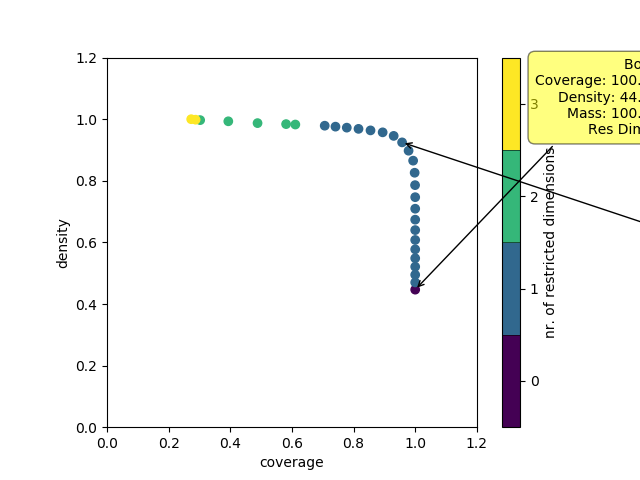

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook

from ema_workbench.analysis import prim
from ema_workbench import ema_logging

x = experiments

y = outcomes['Effectiveness'] > 0.8


'''
for a, b in zip(costs,deaths):
    y.append(a and b)
    
'''

numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage    0.957456
density      0.92474
mass          0.4624
mean         0.92474
res dim            1
Name: 15, dtype: object

          box 15                    
             min       max qp values
beta_i  0.315036  0.499991       0.0



<IPython.core.display.Javascript object>


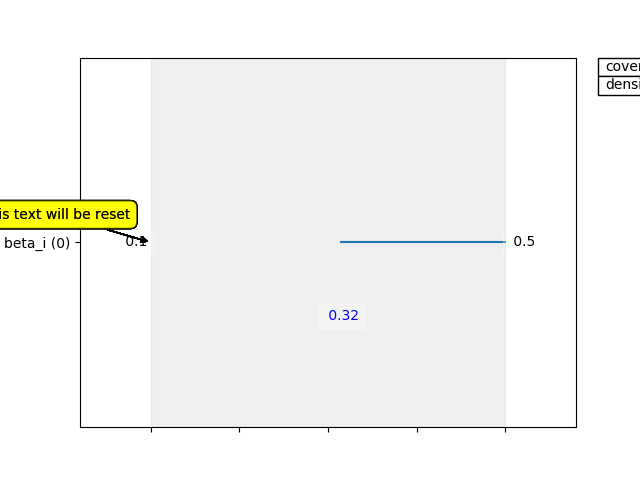

In [7]:
box1.inspect(15)
box1.inspect(15, style='graph')
plt.show()

So when transmission rates are high you can save a lot of people? - In comparison to doing nothing, when everything spirals out of controll I guess.

What if effectiveness is very low?


[MainProcess/INFO] 5000 points remaining, containing 1281 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0644, coverage: 0.25136612021857924, density: 1.0 restricted_dimensions: 3


<IPython.core.display.Javascript object>


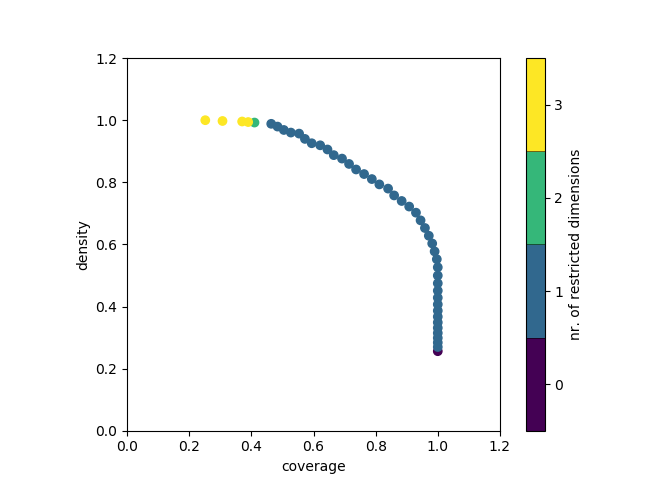

In [14]:
x = experiments

y = outcomes['Effectiveness'] < 0.5


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box2 = prim_alg.find_box()

box2.show_tradeoff()
plt.show()

coverage    0.787666
density     0.810442
mass           0.249
mean        0.810442
res dim            1
Name: 27, dtype: object

          box 27                    
             min       max qp values
beta_i  0.100032  0.199624       0.0



<IPython.core.display.Javascript object>


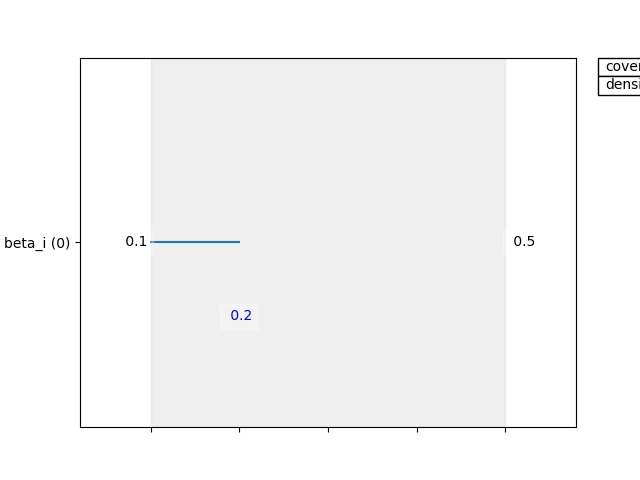

In [19]:
box2.inspect(27)
box2.inspect(27, style='graph')
plt.show()

No box - that means there's too many different factors/values. Not a clear cause.

The fork in the 'equity' plots: equity in arrival times > 1200 but equity in demand < 0.6, and other way around (equity in arrival times < 1200 but equity in demand > 0.6

[MainProcess/INFO] 5000 points remaining, containing 237 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.5652173913043478, returning dump box


<IPython.core.display.Javascript object>


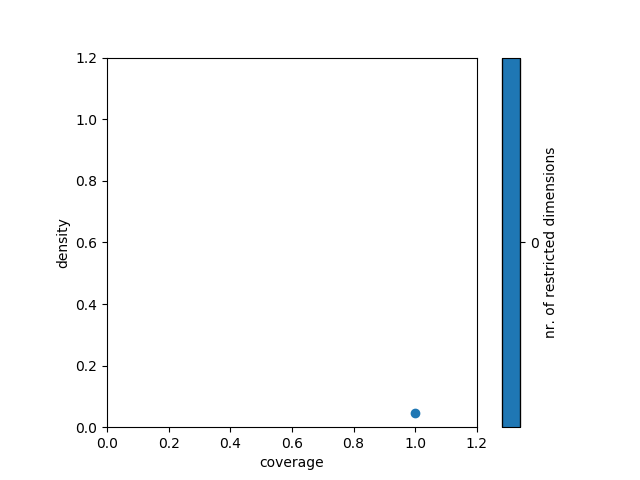

In [11]:
arrival = outcomes['Equity in arrival times'] < 1200
demand = outcomes['Equity in met demand'] > 0.6

y = []

for a, b in zip(arrival,demand):
    y.append(a and b)


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box3 = prim_alg.find_box()

box3.show_tradeoff()
plt.show()

[MainProcess/INFO] 5000 points remaining, containing 926 cases of interest
[MainProcess/INFO] mean: 0.6730769230769231, mass: 0.052, coverage: 0.18898488120950324, density: 0.6730769230769231 restricted_dimensions: 4


<IPython.core.display.Javascript object>


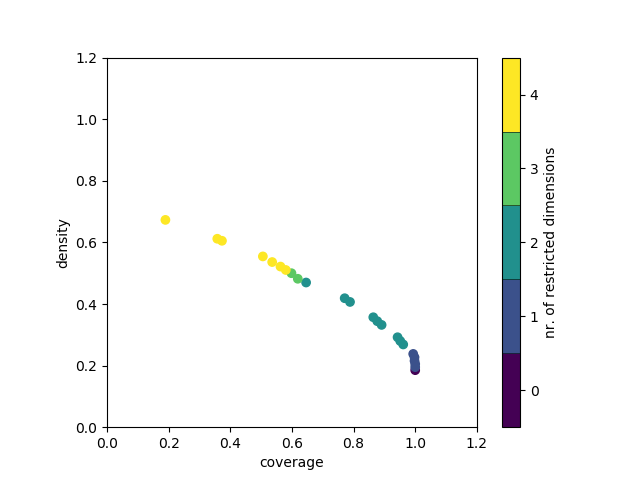

In [28]:
x = experiments

y = outcomes['Speed'] < 20


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.6)
box4 = prim_alg.find_box()

box4.show_tradeoff()
plt.show()

coverage     0.86376
density     0.861849
mass          0.8136
mean        0.861849
res dim            2
Name: 2, dtype: object

           box 2                        
             min       max     qp values
I4      2.000000  7.000000  2.230220e-10
beta_i  0.119999  0.499991  5.750107e-03



<IPython.core.display.Javascript object>


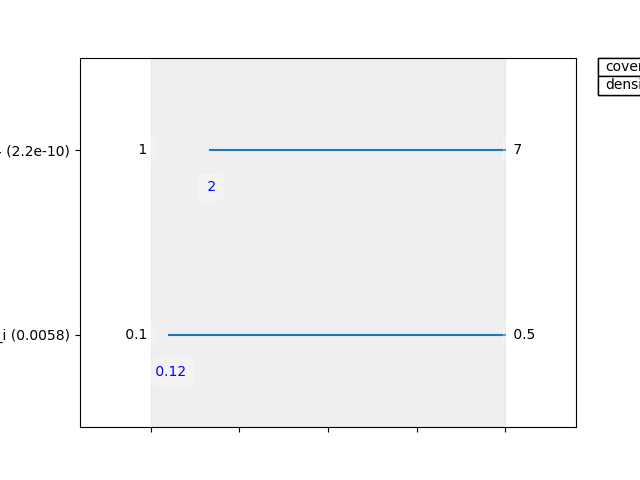

In [27]:
box4.inspect(2)
box4.inspect(2, style='graph')
plt.show()